In [1]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [2]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

## Zbiór danych

In [3]:
chess_king_rook_vs_king = fetch_ucirepo(id=23) 
X = chess_king_rook_vs_king.data.features 
y = chess_king_rook_vs_king.data.targets 

In [4]:
df = pd.merge(X, y, left_index=True, right_index=True)
df

,white-king-file,white-king-rank,white-rook-file,white-rook-rank,black-king-file,black-king-rank,white-depth-of-win
0,a,1,b,3,c,2,draw
1,a,1,c,1,c,2,draw
2,a,1,c,1,d,1,draw
3,a,1,c,1,d,2,draw
4,a,1,c,2,c,1,draw
...,...,...,...,...,...,...,...
28051,b,1,g,7,e,5,sixteen
28052,b,1,g,7,e,6,sixteen
28053,b,1,g,7,e,7,sixteen
28054,b,1,g,7,f,5,sixteen


In [5]:
df['white-king-file'].unique()

array(['a', 'b', 'c', 'd'], dtype=object)

In [6]:
df['white-rook-file'].unique()

array(['b', 'c', 'd', 'e', 'f', 'g', 'h', 'a'], dtype=object)

In [7]:
df['black-king-file'].unique()

array(['c', 'd', 'e', 'f', 'g', 'h', 'a', 'b'], dtype=object)

In [8]:
positions = {'a':1, 'b':2, 'c':3, 'd':4, 'e':5, 'f':6, 'g':7, 'h':8}
for column in ['white-king-file', 'white-rook-file', 'black-king-file']:
    df[column] = df[column].map(positions)

In [9]:
df['white-depth-of-win'].unique()

array(['draw', 'zero', 'one', 'two', 'three', 'four', 'five', 'six',
       'seven', 'eight', 'nine', 'ten', 'eleven', 'twelve', 'thirteen',
       'fourteen', 'fifteen', 'sixteen'], dtype=object)

In [10]:
win_depth = {'draw': -1, 'zero': 0, 'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'seven': 7, 'eight': 8, 
             'nine': 9, 'ten': 10, 'eleven': 11, 'twelve': 12, 'thirteen': 13, 'fourteen': 14, 'fifteen': 15, 'sixteen': 16}
df['white-depth-of-win'] = df['white-depth-of-win'].map(win_depth)
df.head()

,white-king-file,white-king-rank,white-rook-file,white-rook-rank,black-king-file,black-king-rank,white-depth-of-win
0,1,1,2,3,3,2,-1
1,1,1,3,1,3,2,-1
2,1,1,3,1,4,1,-1
3,1,1,3,1,4,2,-1
4,1,1,3,2,3,1,-1


In [11]:
w_col = df['white-king-file']
w_row = df['white-king-rank'] 
b_col = df['black-king-file']
b_row = df['black-king-rank']

In [12]:
df['euklides'] = np.sqrt((w_col - b_col)**2 + (w_row - b_row)**2)
df['manhattan'] = np.abs(w_col - b_col) + np.abs(w_row - b_row)
df['czebyszew'] = np.maximum(np.abs(w_col - b_col), np.abs(w_row - b_row))
df.head()

,white-king-file,white-king-rank,white-rook-file,white-rook-rank,black-king-file,black-king-rank,white-depth-of-win,euklides,manhattan,czebyszew
0,1,1,2,3,3,2,-1,2.236068,3,2
1,1,1,3,1,3,2,-1,2.236068,3,2
2,1,1,3,1,4,1,-1,3.000000,3,3
3,1,1,3,1,4,2,-1,3.162278,4,3
4,1,1,3,2,3,1,-1,2.000000,2,2


In [13]:
dist = pd.DataFrame({'left': df['black-king-file'] - 1, 'right': 8 - df['black-king-file'], 'bottom': df['black-king-rank'] - 1, 'top': 8 - df['black-king-rank']})
df['bk_distance'] = dist.min(axis=1)
df.head()

,white-king-file,white-king-rank,white-rook-file,white-rook-rank,black-king-file,black-king-rank,white-depth-of-win,euklides,manhattan,czebyszew,bk_distance
0,1,1,2,3,3,2,-1,2.236068,3,2,1
1,1,1,3,1,3,2,-1,2.236068,3,2,1
2,1,1,3,1,4,1,-1,3.000000,3,3,0
3,1,1,3,1,4,2,-1,3.162278,4,3,1
4,1,1,3,2,3,1,-1,2.000000,2,2,0


# Pytanie 1
Gdzie zwykle znajduje się na planszy czarny król, kiedy jest matowany (white-depth-of-win=0)? Gdzie znajduje się, kiedy gra kończy się remisem (white-depth-of-win=-1)?

In [14]:
mat = df[df['white-depth-of-win'] == 0].groupby(['black-king-rank', 'black-king-file']).size().unstack(fill_value=0)
remis = df[df['white-depth-of-win'] == -1].groupby(['black-king-rank', 'black-king-file']).size().unstack(fill_value=0)
mat = mat.reindex(index=range(1, 9), columns=range(1, 9), fill_value=0)
remis = remis.reindex(index=range(1, 9), columns=range(1, 9), fill_value=0)
mat = mat.sort_index(ascending = False)
remis = remis.sort_index(ascending = False)

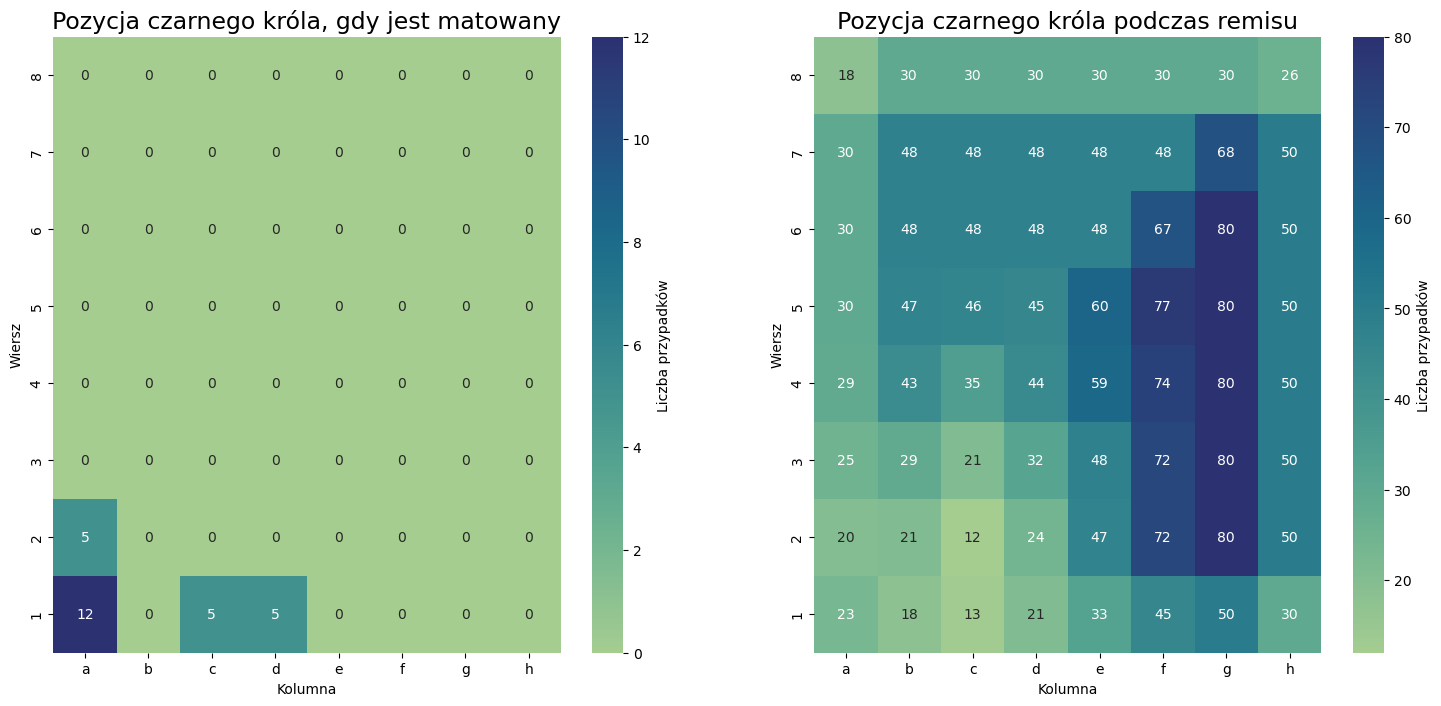

In [15]:
alfabet = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']
plt.figure(figsize=(18, 8))

plt.subplot(1, 2, 1)
sns.heatmap(mat, annot=True, fmt="d", cmap="crest", xticklabels=alfabet, yticklabels=mat.index, cbar_kws={'label': 'Liczba przypadków'})
plt.title('Pozycja czarnego króla, gdy jest matowany', size=17)
plt.xlabel('Kolumna')
plt.ylabel('Wiersz')

plt.subplot(1, 2, 2)
sns.heatmap(remis, annot=True, fmt="d", cmap="crest", xticklabels=alfabet, yticklabels=remis.index, cbar_kws={'label': 'Liczba przypadków'})
plt.title('Pozycja czarnego króla podczas remisu', size=17)
plt.xlabel('Kolumna')
plt.ylabel('Wiersz')

plt.show()

Po przyjrzeniu się heatmapom dochodzimy do poniższych wniosków:
 - Król, gdy jest matowany najczęściej znajduje się w lewym dolnym rogu planszy, a dokładniej a miejscu A1.
 - Natomiast, gdy gra kończy się remisem król zawzwyczaj pojawia się mna jednym z tych miejsc: G6, G5, G4, G3 oraz G2, zatem najczęściej jest wtedy w kolumnie G.

# Pytanie 2
Jednym z istotnych czynników tego, w ilu ruchach gra się zakończy jest dystans pomiędzy białym królem a czarnym królem. Jaka metryka dystansu (Euklidesowa, Manhattan, lub Czebyszewa) pomiędzy nimi pozwoli najlepiej oszacować liczbę ruchów do zakończenia gry? Do tej analizy zignoruj sytuacje remisowe (white-depth-of-win = -1).

In [16]:
df2 = df[df['white-depth-of-win'] != -1].copy()

In [17]:
wsp_korelacji = df2[['euklides','manhattan','czebyszew']].corrwith(df2['white-depth-of-win'])

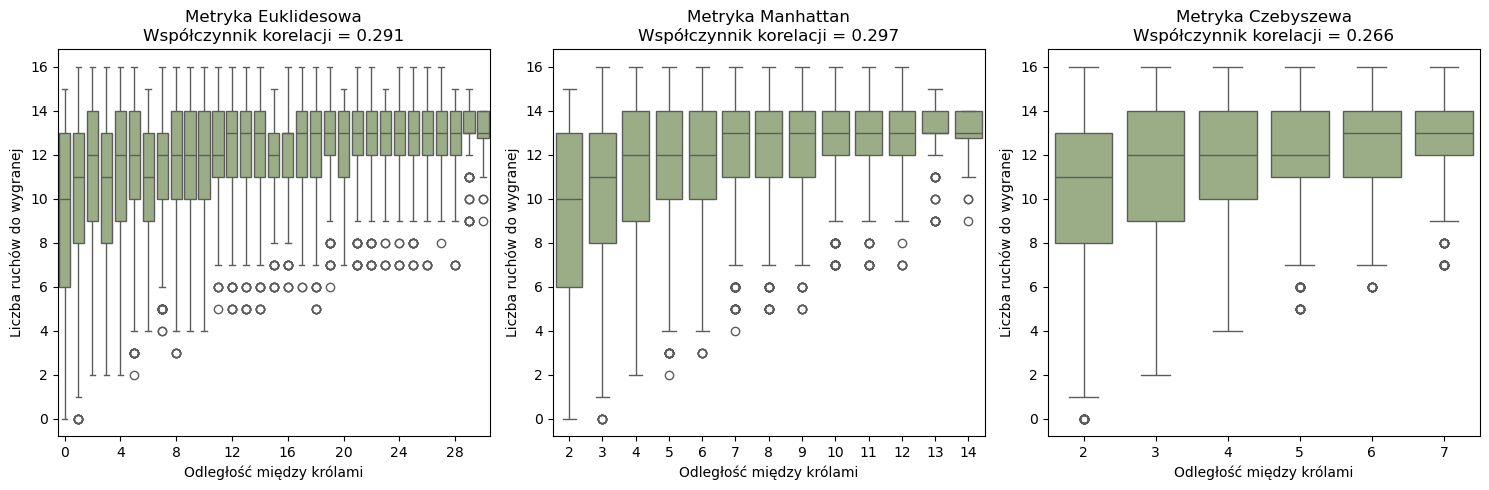

In [18]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
metrics = [('euklides', 'Metryka Euklidesowa'), ('manhattan', 'Metryka Manhattan'), ('czebyszew', 'Metryka Czebyszewa')]
for i, (column, title) in enumerate(metrics):
    sns.boxplot(data=df2, y='white-depth-of-win', x=column, ax=ax[i], color="#9CB380")
    ax[i].set_title(f'{title}\nWspółczynnik korelacji = {wsp_korelacji[column]:.3f}')
    ax[i].set_xlabel('Odległość między królami')
    ax[i].set_ylabel('Liczba ruchów do wygranej')
ax[0].xaxis.set_major_locator(ticker.MaxNLocator(nbins=8)) #aby na osi x wartości były widoczne
ax[0].xaxis.set_major_formatter('{:.0f}'.format)
plt.tight_layout()
plt.show()

Zauważmy, że dla metryki Manhattan współczynnik korelacji jest największy. Zatem to ona pozwoli najlepiej oszacować liczbę ruchów do zakończenia gry.

# Pytanie 3
Czy informacja o odległości czarnego króla od krawędzi planszy może być przydatna w określeniu w ilu ruchach zakończy się gra? Czy uzupełnienie tej informacji o odległość pomiędzy białym a czarnym królem z poprzedniego zadania może dodatkowo pomóc? Do tej analizy zignoruj sytuacje remisowe (white-depth-of-win = -1).

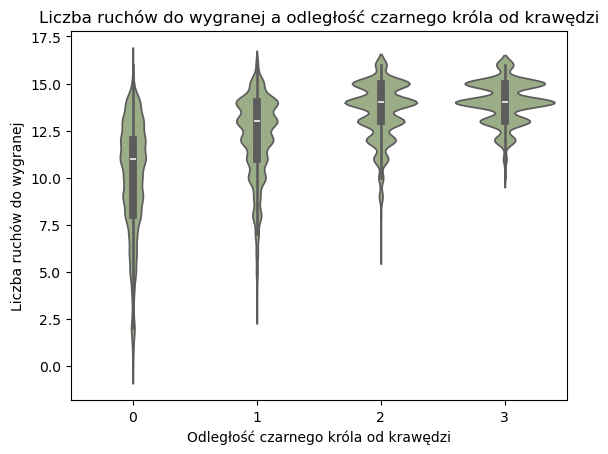

In [19]:
plot1 = sns.violinplot(data=df2, x='bk_distance', y='white-depth-of-win', color='#9CB380')
plt.title('Liczba ruchów do wygranej a odległość czarnego króla od krawędzi')
plt.xlabel('Odległość czarnego króla od krawędzi')
plt.ylabel('Liczba ruchów do wygranej')
plt.show()

Odległość króla czarnego króla od krawędzi planszy może być przydatna w określeniu w ilu ruchach zakończy się gra. Im mniejsza jego odległość od krawędzi tym przeważnie mniej ruchów zostaje do końca. 

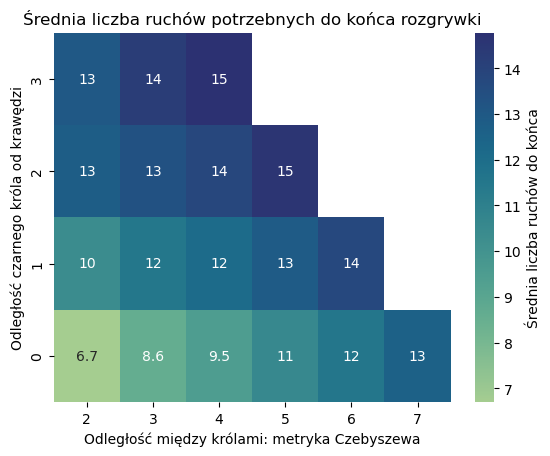

In [20]:
df3 = df2.groupby(['bk_distance', 'czebyszew'])['white-depth-of-win'].mean().unstack()
plot2 = sns.heatmap(df3, annot=True, cmap='crest', cbar_kws={'label': 'Średnia liczba ruchów do końca'})
plot2.invert_yaxis()
plt.title('Średnia liczba ruchów potrzebnych do końca rozgrywki')
plt.xlabel('Odległość między królami: metryka Czebyszewa')
plt.ylabel('Odległość czarnego króla od krawędzi')
plt.show()

Uzupełniłam informację o odległość pomiędzy białym a czarnym królem (metryka Czebyszewa) i dochodzimy do wniosku, że to też nam pomaga. Zauważmy, że połączenie odległości między królami oraz odległości czarnego króla od krawędzi na jednym wykresie daje nam jasne wnioski. Im mniejsze te dwa tym mniejsza jest średnia liczba ruchów do końca rozgrywki.